#  Ordinary Differential Equations Algorithms

### Packages and Configurations 

In [1]:
include("DiffSolving.jl")
using Plots, LaTeXStrings
cd(dirname(@__FILE__))

## First Order ODE

### RC Circuit

##### *Comparison Between Euler Method and Numerical Solution*

In [10]:
rc=1.0; tₘᵢₙ=0.0; tₘₐₓ=5.0; h=0.01; q₀=1.0
t_range, Q=DiffSolving.EulerMethod((t,x)->(q₀ .- x )/rc, [0.0], tₘᵢₙ, tₘₐₓ, h)
plot(t_range, Q,label="Euler Method",ylabel=L"Q(t)",xlabel="t(s)",title=L"\Delta t=0.01s", dpi=400, color=:orchid4, linewidth=3)
plot!(t -> q₀ *(1 - exp(-t/rc)), label="Numerical Solution", linewidth=3, color=:pink1, linestyle=:dash, legend=:bottomright)
savefig("../../computational_physics/PSet9/Figs/Euler_compare.pdf")

##### *Error Plot*

In [25]:
step_list=collect(range(0.01, 1, length=100))
Error_list=[]
for h in step_list
    t_range, Q=DiffSolving.EulerMethod((t,x)->(q₀ .- x )/rc, xᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, h)
    push!(Error_list, abs(sum(Q .- q₀ .*(1 .- exp.(-t_range ./rc)))))
end
plot(step_list, Error_list, ylabel=L"Error", xlabel=L"Step\ Size",
     title=L"Error\ of\ the\ Euler\ Method's\ Solution\ for\ different\ Steps",lw=2, color=:darkorange,dpi=400, legend=false)
savefig("../../computational_physics/PSet9/Figs/Euler_Error.pdf")


##### *Instability for the Given Algorithm*

In [63]:
t_range, Q=DiffSolving.InstableAlgorithm((t,x)->(q₀ .- x )/rc, xᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, 0.08)
plot(t_range, Q, color=:darkgoldenrod2, dpi=400, label="Instable Solution", xlabel=L"t/RC", ylabel=L"Q(t)")
plot!(t -> q₀ *(1 - exp(-t/rc)), label="Numerical Solution", linewidth=2, color=:brown4, linestyle=:dash, legend=:bottomright)
savefig("../../computational_physics/PSet9/Figs/Instability.pdf")

## Second Order ODE

### Simple Harmonic Oscillator 

##### *Place - Time and Velocity - Time plots*

In [37]:
xᵢₙᵢₜ , vᵢₙᵢₜ= 1.0, 0.0; step=0.1;  n=5; tₘᵢₙ=0.0; tₘₐₓ=8.0; h=0.5
x_plot = plot(cos, tₘᵢₙ, tₘₐₓ, color=:cadetblue4, label=L"x(t)=x_0 cos(\omega t)")
v_plot = plot(t -> -sin(t), tₘᵢₙ, tₘₐₓ, color=:hotpink3, label=L"v(t)=\omega x_0 sin(\omega t")
t_E, x_E= DiffSolving.EulerMethod((t,x)-> [x[2], -x[1]], [1.0, 0.0], tₘᵢₙ, tₘₐₓ, h)
xPlot=plot!(x_plot,t_E ,x_E[: ,1], label="Euler", ls=:dot, marker=:circle, ylabel=L"x/x_0")
vPlot=plot!(v_plot,t_E, x_E[: ,2], label="Euler", ls=:dot, marker=:circle, ylabel=L"v/\omega x_0")
plot!(xPlot, vPlot, layout=(1,2), dpi=400, title="step=0.5", xlabel=L"\Delta t/\omega", legend=:topleft)
savefig("../../computational_physics/PSet9/Figs/SHM_Euler_comparison.pdf")


In [58]:
xᵢₙᵢₜ , vᵢₙᵢₜ= 1.0, 0.0; step=0.1;  n=5; tₘᵢₙ=0.0; tₘₐₓ=round(2π * n); h=0.5
t_EC, x_EC, v_EC = DiffSolving.EulerCromer((t,x)-> -x, xᵢₙᵢₜ , vᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, h)
t_V, x_V, v_V = DiffSolving.Verlet((t,x)-> -x, xᵢₙᵢₜ , vᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, h)
t_VV, x_VV, v_VV = DiffSolving.VelocityVerlet((t,x)-> -x, xᵢₙᵢₜ , vᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, h)

([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5  …  26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0], [1.0, 0.875, 0.53125, 0.0546875, -0.435546875, -0.81689453125, -0.9940185546875, -0.922637939453125, -0.6205978393554688, -0.1634082794189453  …  -0.0804823491318539, -0.5529744955191296, -0.8872230180266228, -0.9996657860274605, -0.8621921075214329, -0.5091704021350472, -0.028856096214899596, 0.4586722337589728, 0.831532505293102, 0.9965096505039558], [0.0, -0.46875, -0.8203125, -0.966796875, -0.87158203125, -0.5584716796875, -0.105743408203125, 0.37342071533203125, 0.7592296600341797, 0.9552311897277832  …  -0.9651048800575148, -0.8067406688947689, -0.4466912905083308, 0.025030910505190018, 0.4904953838924134, 0.8333360113065333, 0.96784263589402, 0.8603886015080017, 0.537837416744983, 0.08082687779571851])

In [59]:
plot(cos, tₘᵢₙ, tₘₐₓ, lw=:4, label=L"x(t)=x_0 cos(\omega t)", title=L"step=0.5",
    color=:navajowhite, dpi=400,xlabel=L"t/\omega", ylabel=L"x/x_0" , legendfontsize=5)
plot!(t_EC, x_EC, label="Euler-Cromer", ls=:dot,lw=4, marker=:circle, color=:violet)
plot!(t_V, x_V, label="Verlet", ls=:dot, lw=4, marker=:square, color=:midnightblue)
plot!(t_VV, x_VV, label="Velocity Verlet", ls=:dot, lw=4 , marker=:utriangle, color=:seagreen1)
savefig("../../computational_physics/PSet9/Figs/SHM_x_comparison.pdf")

In [60]:
plot(t -> -sin(t), tₘᵢₙ, tₘₐₓ, label=L"v(t)=\omega x_0 sin(\omega t)", title=L"step=0.5",
    lw=4,color=:navajowhite, dpi=400,xlabel=L"t/\omega", ylabel=L"v/\omega x_0", legendfontsize=5)
plot!(t_EC, v_EC, label="Euler-Cromer", ls=:dot,lw=4, marker=:circle, color=:violet)
plot!(t_V, v_V, label="Verlet", ls=:dot, lw=4, marker=:square, color=:midnightblue)
plot!(t_VV, v_VV, label="Velocity Verlet", ls=:dot, lw=4 , marker=:utriangle, color=:seagreen1)
savefig("../../computational_physics/PSet9/Figs/SHM_v_comparison.pdf")


##### *Phase Space Plots and Conservation of Energy*

In [54]:
xᵢₙᵢₜ , vᵢₙᵢₜ= 1.0, 0.0; step=0.1;  n=2; tₘᵢₙ=0.0; tₘₐₓ=8.0; h=0.5
t_E, x_E= DiffSolving.EulerMethod((t,x)-> [x[2], -x[1]], [1.0, 0.0], tₘᵢₙ, tₘₐₓ, h)
plot(cos, t -> -sin(t), tₘᵢₙ, tₘₐₓ , ylabel=L"v/\omega x_0", xlabel=L"x/x_0", title=L"Phase-Space\ plot,Step=0.5",
     color=:rosybrown2, lw=4, label="Numerical Solution", legendfontsize=7, legend=:bottomleft, dpi=400)
plot!(x_E[: ,1], x_E[:, 2], color=:maroon, lw=3, ls=:dot, marker=:circle, label="Euler")
savefig("../../computational_physics/PSet9/Figs/SHM_Euler_PhaseSpace.pdf")

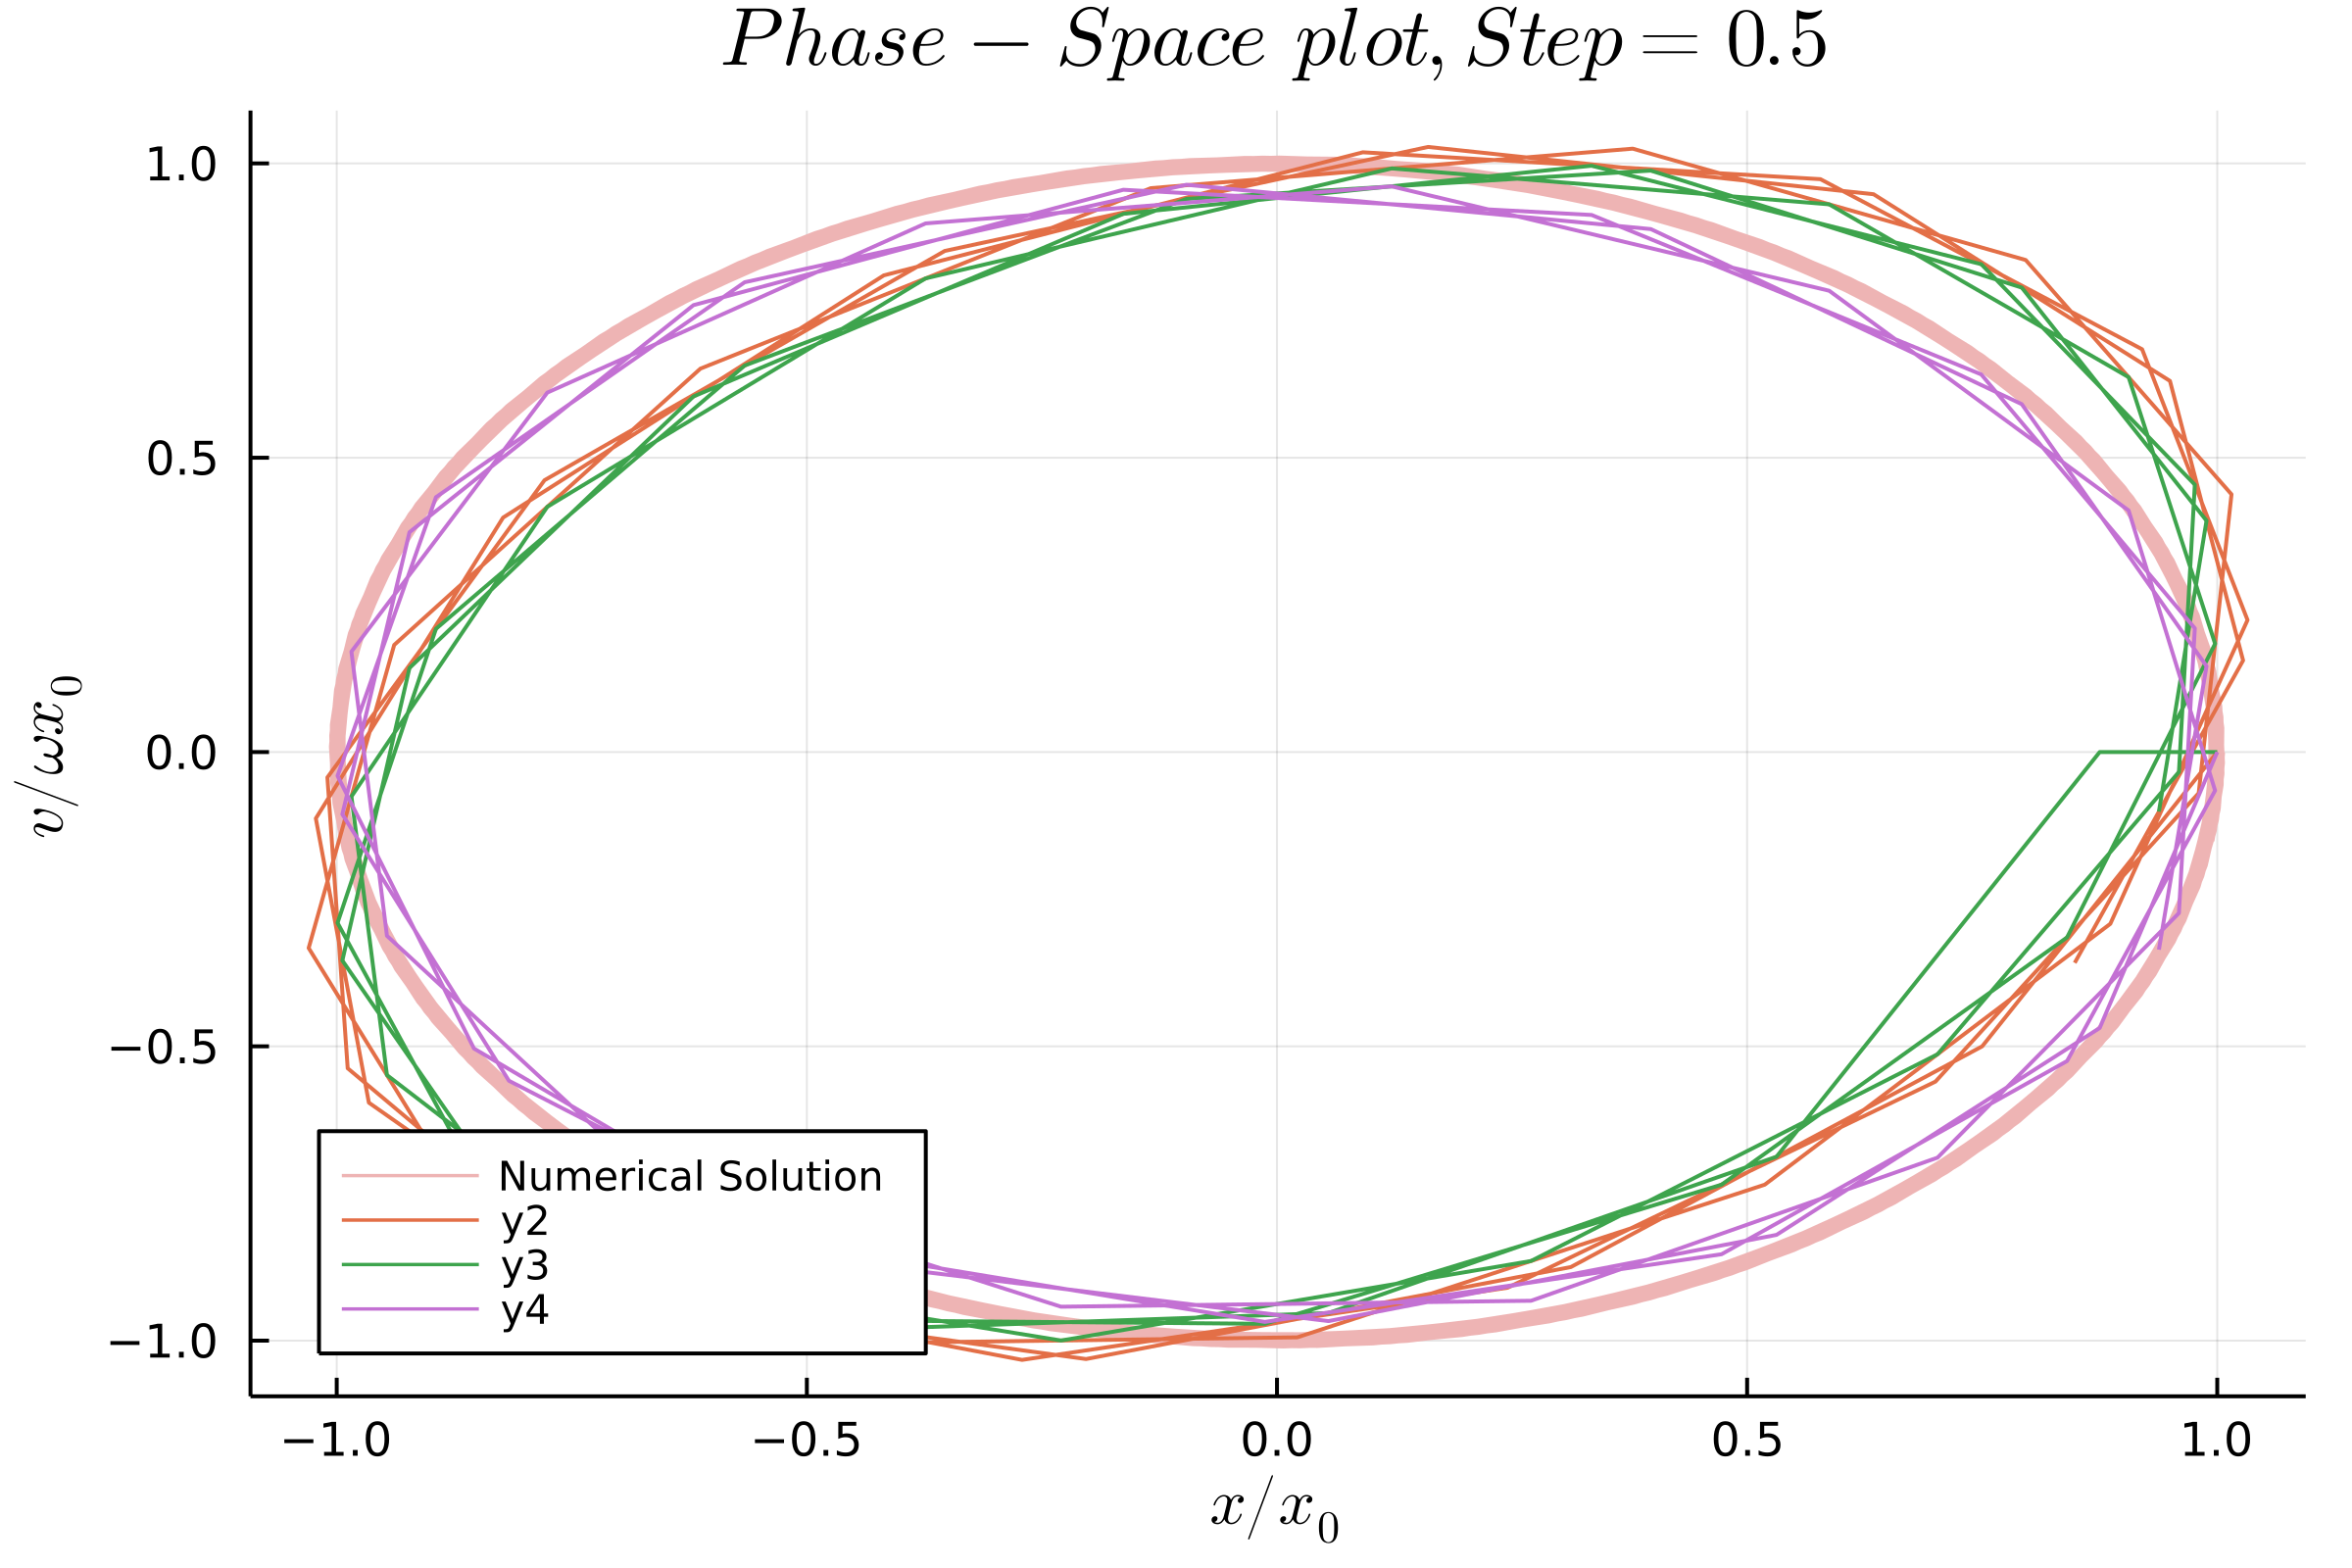

In [57]:
plot(cos, t -> -sin(t), tₘᵢₙ, tₘₐₓ , ylabel=L"v/\omega x_0", xlabel=L"x/x_0", title=L"Phase-Space\ plot,Step=0.5",
    color=:rosybrown2, lw=4, label="Numerical Solution", legendfontsize=7, legend=:bottomleft, dpi=400)
plot!(x_EC, v_EC)
plot!(x_V, v_V)
plot!(x_VV, v_VV)
